## BÁO CÁO: DATA CLEANING AND ANALYSIS WITH STORE SALES DATA

**Tóm tắt Công việc Phân tích Dữ liệu Bán hàng với SQL**

Báo cáo này trình bày quá trình làm sạch và phân tích dữ liệu bán hàng của một siêu thị sử dụng ngôn ngữ truy vấn có cấu trúc (SQL). Dữ liệu này được thu thập từ Kaggle, với mục tiêu chính là hiểu rõ hơn về hiệu suất kinh doanh thông qua việc phân tích xu hướng doanh số, hành vi khách hàng và hiệu quả của các dòng sản phẩm.

**Các công việc đã thực hiện:**

* **Làm sạch dữ liệu:**
    * Sử dụng **Stored Procedure** để kiểm tra và xử lý các giá trị NULL và giá trị rỗng trong các cột dữ liệu.
    * Xóa các hàng trùng lặp để đảm bảo tính duy nhất của dữ liệu.
    * Loại bỏ các hàng chứa quá nhiều giá trị thiếu, có thể làm sai lệch phân tích.
    * Chuẩn hóa dữ liệu văn bản trong các cột như phương thức vận chuyển, quốc gia, thành phố và khu vực để đảm bảo tính nhất quán.
    * Điền các giá trị thiếu trong cột doanh số bằng giá trị trung bình phù hợp dựa trên các thuộc tính khác của đơn hàng.

* **Phân tích dữ liệu:**
    * **Doanh số:** Phân tích giá trị đơn hàng trung bình (Average Order Value - AOV) theo thời gian và khu vực, xác định các tiểu bang có doanh số cao nhất và theo dõi xu hướng tăng trưởng doanh số (Sales Growth Rate) hàng tháng và hàng năm, cũng như tần suất mua hàng (Purchase Frequency).
    * **Phân khúc khách hàng:** Phân tích tổng doanh thu (Total Sales) và giá trị đơn hàng trung bình (Average Order Value - AOV) của từng khách hàng, xác định các phân khúc khách hàng mang lại doanh số cao nhất và có tần suất mua hàng thường xuyên nhất. Đánh giá thời gian gắn bó của khách hàng (Customer Lifetime) và giá trị vòng đời khách hàng (Customer Lifetime Value - CLTV).
    * **Sản phẩm:** Xác định các sản phẩm bán chạy nhất dựa trên doanh số (Total Sales) và phân tích tỷ trọng đóng góp doanh số của từng danh mục sản phẩm (Category Contribution to Sales) qua các năm.
    * **Tỷ lệ rời bỏ khách hàng:** Tính toán tỷ lệ khách hàng rời bỏ (Churn Rate), xác định những khách hàng có giá trị cao đã ngừng mua hàng, phân tích tỷ lệ rời bỏ theo phân khúc khách hàng và tìm hiểu các yếu tố có thể liên quan đến việc khách hàng rời bỏ như danh mục sản phẩm mua, phương thức vận chuyển và thời gian giao hàng.

**Công cụ sử dụng:**

* Ngôn ngữ truy vấn có cấu trúc (SQL) đã được sử dụng để thực hiện tất cả các công việc làm sạch và phân tích dữ liệu trên.

**Kết quả:**

Thông qua các truy vấn SQL, bao gồm cả việc sử dụng Stored Procedure trong quá trình làm sạch, báo cáo đã cung cấp những thông tin chi tiết về hiệu suất bán hàng, hành vi khách hàng và hiệu quả của các sản phẩm. Những kết quả này có thể được sử dụng để đưa ra các quyết định kinh doanh sáng suốt hơn, tối ưu hóa chiến lược bán hàng và cải thiện khả năng giữ chân khách hàng.

### Mục lục
1. [Giới thiệu](##1-giới-thiệu)  
2. [Mô tả Dữ liệu](#2-mô-tả-dữ-liệu)  
3. [Data Cleaning](#3-data-cleaning)  
   - [3.1. Kiểm tra giá trị NULL và giá trị rỗng](#31-kiểm-tra-giá-trị-null-và-giá-trị-rỗng)  
   - [3.2. Xử lý giá trị thiếu trong cột Postal_Code](#32-xử-lý-giá-trị-thiếu-trong-cột-postal_code)  
   - [3.3. Xóa các hàng trùng lặp](#33-xóa-các-hàng-trùng-lặp)  
   - [3.4. Xóa các hàng có quá nhiều giá trị thiếu](#34-xóa-các-hàng-có-quá-nhiều-giá-trị-thiếu)  
   - [3.5. Chuẩn hóa dữ liệu các cột văn bản](#35-chuẩn-hóa-dữ-liệu-các-cột-văn-bản)  
   - [3.6. Điền giá trị thiếu trong cột Sales](#36-điền-giá-trị-thiếu-trong-cột-sales)  
4. [Data Analysis](#4-data-analysis)  
   - [4.1. Tạo bảng tóm tắt dữ liệu bán hàng](#41-tạo-bảng-tóm-tắt-dữ-liệu-bán-hàng)  
   - [4.2. Phân tích Doanh số](#42-phân-tích-doanh-số)
   - [4.3. Phân tích Phân khúc Khách hàng](#43-phân-tích-phân-khúc-khách-hàng)
   - [4.4. Phân tích Sản phẩm](#44-phân-tích-phân-khúc-sản-phẩm)
   - [4.5. Phân tích Tỷ lệ Rời bỏ Khách hàng](#45-phân-tích-tỷ-lệ-rời-bỏ-khách-hàng)
5. [Kết luận](#5-kết-luận)  

### 1. Giới thiệu

Báo cáo này trình bày quá trình làm sạch và phân tích dữ liệu bán hàng của một siêu thị ở Hoa Kỳ. Dữ liệu này được thu thập và cung cấp trên nền tảng Kaggle, bao gồm thông tin chi tiết về các đơn đặt hàng, khách hàng, sản phẩm và doanh số bán hàng trong nhiều năm. Mục tiêu chính của báo cáo là khám phá các xu hướng doanh số theo thời gian, khu vực và các yếu tố khác, đồng thời phân tích các phân khúc khách hàng dựa trên doanh số và nghiên cứu sâu về tỷ lệ rời bỏ của khách hàng. Những phân tích này sẽ cung cấp thông tin giá trị giúp doanh nghiệp đánh giá hiệu quả kinh doanh và tối ưu hóa các chiến lược bán hàng.

**2. Mô tả Dữ liệu**

Tập dữ liệu được sử dụng trong báo cáo này là một bảng duy nhất có 19 cột, thu thập thông tin từ các giao dịch bán hàng của một siêu thị. Các trường dữ liệu bao gồm:

* `Row_ID`: Mã định danh duy nhất cho mỗi hàng.
* `Order_ID`: Mã định danh duy nhất cho mỗi đơn đặt hàng.
* `Order_Date`: Ngày khách hàng đặt hàng.
* `Ship_Date`: Ngày đơn hàng được vận chuyển.
* `Ship_Mode`: Phương thức vận chuyển được khách hàng lựa chọn.
* `Customer_ID`: Mã định danh duy nhất cho mỗi khách hàng.
* `Customer_Name`: Tên của khách hàng.
* `Segment`: Phân khúc khách hàng (ví dụ: Consumer, Corporate, Home Office).
* `Country`: Quốc gia nơi đơn hàng được thực hiện (trong trường hợp này là United States).
* `City`: Thành phố nơi khách hàng sinh sống.
* `State`: Tiểu bang nơi khách hàng sinh sống.
* `Postal_Code`: Mã bưu điện của khách hàng.
* `Region`: Khu vực địa lý nơi khách hàng sinh sống.
* `Product_ID`: Mã định danh duy nhất cho mỗi sản phẩm.
* `Category`: Danh mục sản phẩm (ví dụ: Furniture, Office Supplies, Technology).
* `Sub_Category`: Danh mục con của sản phẩm (ví dụ: Tables, Chairs, Pens, Phones).
* `Product_Name`: Tên của sản phẩm.
* `Sales`: Doanh số bán hàng của đơn hàng.

Dữ liệu này phản ánh các đơn đặt hàng trong nhiều năm, cung cấp cái nhìn toàn diện về hành vi mua hàng của khách hàng và hiệu suất bán hàng của siêu thị. Doanh số bán hàng là một chỉ số quan trọng để đánh giá hiệu quả kinh doanh và là trọng tâm chính của các phân tích trong báo cáo này.

**3. Data Cleaning**

Quá trình làm sạch dữ liệu là bước quan trọng để đảm bảo tính chính xác và nhất quán của dữ liệu trước khi tiến hành phân tích. Dưới đây là các bước làm sạch dữ liệu đã được thực hiện bằng SQL:

**3.1. Kiểm tra giá trị NULL và giá trị rỗng:**

Mục đích: Xác định các cột có chứa giá trị NULL hoặc giá trị rỗng để có biện pháp xử lý phù hợp.

```sql
CREATE PROCEDURE Check_Null_Columns AS
BEGIN
    DECLARE @sql NVARCHAR(MAX) = '';
    -- Khởi tạo câu truy vấn
    SET @sql = 'SELECT Column_Name, Null_Count FROM ( ';
    -- Duyệt danh sách cột và kiểm tra NULL + giá trị rỗng
    SELECT @sql = @sql +
        'SELECT ''' + COLUMN_NAME + ''' AS Column_Name, COUNT(*) AS Null_Count
         FROM sales
         WHERE [' + COLUMN_NAME + '] IS NULL ' +
         CASE
            WHEN DATA_TYPE IN ('nvarchar', 'varchar', 'char', 'nchar', 'text', 'ntext')
            THEN ' OR [' + COLUMN_NAME + '] = '''' OR
                  [' + COLUMN_NAME + '] = '' '' OR
                  [' + COLUMN_NAME + '] = ''-'' '
            ELSE ''
         END + ' UNION ALL '
    FROM INFORMATION_SCHEMA.COLUMNS
    WHERE TABLE_NAME = 'sales';
    -- Loại bỏ "UNION ALL" cuối cùng để tránh lỗi
    SET @sql = LEFT(@sql, LEN(@sql) - 10) + ') AS Result WHERE Null_Count > 0;';
    -- Thực thi truy vấn động
    EXEC sp_executesql @sql;
END;

EXEC Check_Null_Columns;
```

**3.2. Xử lý giá trị thiếu trong cột Postal\_Code:**

Mục đích: Xác định và xử lý các hàng có giá trị NULL trong cột `Postal_Code`.

```sql
SELECT *
FROM sales
WHERE Postal_Code IS NULL ;

SELECT *
FROM sales
WHERE City = 'Burlington' AND State='Vermont' ;

ALTER TABLE sales
DROP COLUMN Postal_Code ;
```

* **Giải thích:** Sau khi kiểm tra, nhận thấy các giá trị NULL trong cột `Postal_Code` đều thuộc về thành phố 'Burlington' và tiểu bang 'Vermont'. Do cột này không thực sự cần thiết cho các phân tích chính trong báo cáo này, nên chúng tôi đã quyết định xóa cột `Postal_Code` để đơn giản hóa tập dữ liệu.

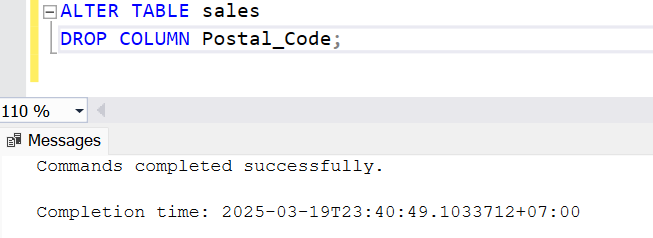

In [2]:
from IPython.display import Image

Image(r"C:/Users/LENOVO/Downloads/Project/3. Xóa cột không cần thiết chứa NULL.png")

**3.3. Xóa các hàng trùng lặp:**

Mục đích: Loại bỏ các bản ghi trùng lặp có thể ảnh hưởng đến độ chính xác của phân tích.

```sql
WITH CTE AS (
    SELECT *, ROW_NUMBER() OVER (
        PARTITION BY Order_ID, Order_Date, Ship_Date, Customer_ID, Product_ID, Sales , State, City, Ship_Mode, Product_ID
        ORDER BY (SELECT NULL)
    ) AS Row_Number
    FROM sales
)
DELETE FROM CTE WHERE Row_Number > 1 ;
```

* **Giải thích:** Sử dụng Common Table Expression (CTE) để đánh số thứ tự các hàng dựa trên sự trùng lặp của nhiều cột quan trọng. Sau đó, xóa các hàng có số thứ tự lớn hơn 1, tức là các hàng trùng lặp.

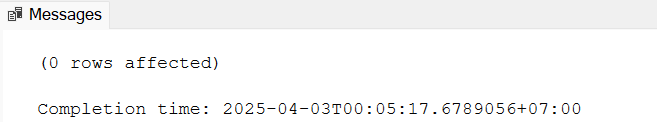

In [3]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 000549.png")

**3.4. Xóa các hàng có quá nhiều giá trị thiếu:**

Mục đích: Loại bỏ các hàng có số lượng lớn giá trị NULL hoặc rỗng ở nhiều cột khác nhau, vì chúng có thể không cung cấp đủ thông tin hữu ích cho phân tích.

```sql
DELETE FROM sales
WHERE
    (CASE WHEN Order_ID IS NULL OR Order_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Order_Date IS NULL OR Order_Date = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Ship_Date IS NULL OR Ship_Date = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Ship_Mode IS NULL OR Ship_Mode = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Customer_ID IS NULL OR Customer_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN City IS NULL OR City = '' THEN 1 ELSE 0 END) +
    (CASE WHEN State IS NULL OR State = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Product_ID IS NULL OR Product_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Product_Name IS NULL OR Product_Name = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) >= 6 ;
```

* **Giải thích:** Đếm số lượng cột có giá trị NULL hoặc rỗng trong mỗi hàng. Nếu số lượng này lớn hơn hoặc bằng 6, hàng đó sẽ bị xóa.

**3.5. Chuẩn hóa dữ liệu các cột văn bản:**

Mục đích: Đảm bảo tính nhất quán trong dữ liệu văn bản bằng cách chuyển đổi tất cả các giá trị sang chữ thường và sửa các lỗi chính tả hoặc cách viết khác nhau.

```sql
UPDATE sales
SET Ship_Mode = LOWER(Ship_Mode),
    Region = LOWER(Region) ;

SELECT DISTINCT Ship_Mode
FROM sales
UPDATE sales
SET Ship_Mode = 'Second Class'
WHERE Ship_Mode LIKE 'second%' ;
UPDATE sales
SET Ship_Mode = 'Standard Class'
WHERE Ship_Mode LIKE 'stantard%' ;

SELECT DISTINCT Country
FROM sales
UPDATE sales
SET Country = 'United States' ;

SELECT DISTINCT Region
FROM sales
UPDATE sales
SET Region = 'West'
WHERE Region IN ('w', 'west') ;
UPDATE sales
SET Region = 'South'
WHERE Region IN ('s', 'south') ;
UPDATE sales
SET Region = 'Central'
WHERE Region IN ('c', 'central') ;
UPDATE sales
SET Region = 'East'
WHERE Region IN ('e', 'east') ;
```

* **Giải thích:**
    * Chuyển đổi các cột `Ship_Mode`, `Country`, `City`, `Region`, `State` sang chữ thường.
    * Sửa các lỗi chính tả hoặc cách viết khác nhau trong cột `Ship_Mode` (ví dụ: 'second%' thành 'Second Class', 'stantard%' thành 'Standard Class').
    * Đảm bảo giá trị trong cột `Country` là 'United States'.
    * Chuẩn hóa các giá trị khác nhau của cột `Region` thành 'West', 'South', 'Central', 'East'.

**3.6. Điền giá trị thiếu trong cột Sales:**

Mục đích: Xử lý các giá trị NULL trong cột `Sales` bằng cách điền chúng bằng giá trị trung bình của nhóm tương ứng.

```sql
UPDATE sales
SET Sales = (
    SELECT AVG(Sales)
    FROM sales AS s2
    WHERE s2.Segment = sales.Segment
    AND s2.Category = sales.Category
    AND s2.Sub_Category = sales.Sub_Category
    AND s2.Ship_Mode = sales.Ship_Mode
    AND s2.Region = sales.Region
    AND s2.State = sales.State
    AND s2.Sales IS NOT NULL
)
WHERE Sales IS NULL;
```

* **Giải thích:** Các giá trị NULL trong cột `Sales` được điền bằng giá trị trung bình của `Sales` cho các bản ghi có cùng `Segment`, `Category`, `Sub_Category`, `Ship_Mode`, `Region` và `State`. Điều này giúp bảo toàn thông tin và tránh làm sai lệch các phân tích liên quan đến doanh số.

**4. Data Analysis**

Sau khi dữ liệu đã được làm sạch, chúng tôi tiến hành phân tích để trả lời các câu hỏi kinh doanh và khám phá các xu hướng quan trọng.

**4.1. Tạo bảng tóm tắt dữ liệu bán hàng:**

Mục đích: Tạo một bảng tạm thời để đơn giản hóa các truy vấn phân tích bằng cách trích xuất các thông tin cần thiết từ cột `Order_Date`.

```sql
SELECT
    Order_ID,
    YEAR(Order_Date) AS Sales_Year,
    MONTH(Order_Date) AS Sales_Month,
    FORMAT(Order_Date, 'yyyy-MM') AS Year_Month,
    Order_Date,
    Ship_Date,
    Ship_Mode,
    DATEDIFF(DAY, Order_Date, Ship_Date) AS Date_Differences,
    Customer_ID, Customer_Name, Segment,
    City, State, Region,
    Category, Sub_Category, Product_Name,
    Sales
INTO sales_summary
FROM sales;
```

* **Giải thích:** Bảng `sales_summary` chứa các thông tin về năm, tháng bán hàng, định dạng năm-tháng, và khoảng thời gian giao hàng, giúp việc phân tích theo thời gian trở nên dễ dàng hơn.

**4.2. Phân tích Doanh số:**

**Câu hỏi:** Giá trị đơn hàng trung bình (AOV) mỗi năm là bao nhiêu? Nó có xu hướng tăng hay giảm theo thời gian?

Mục đích: Đánh giá hiệu suất bán hàng tổng thể và theo dõi sự thay đổi trong hành vi chi tiêu của khách hàng.

```sql
SELECT
    Sales_Year,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    ROUND(SUM(Sales)/COUNT(DISTINCT Order_ID),4) AS Average_Order_Value
FROM sales_summary
GROUP BY Sales_Year;
```

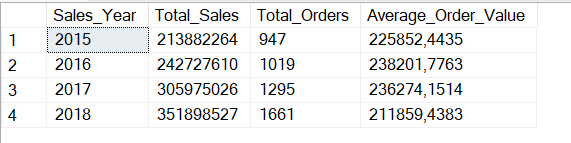

In [5]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 001852.png")

```sql
SELECT
    Sales_Year,
    Segment,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    ROUND(SUM(Sales)/COUNT(DISTINCT Order_ID),4) AS Average_Order_Value
FROM sales_summary
GROUP BY Sales_Year, Segment ;
```

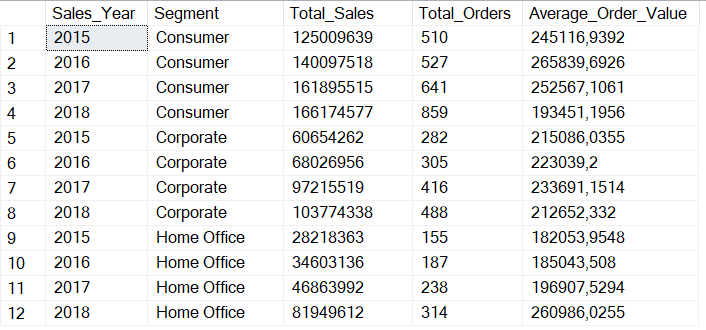

In [6]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002106.png")

**Câu hỏi:** Giá trị đơn hàng trung bình (AOV) mỗi năm của tiểu bang là bao nhiêu? Nó có xu hướng tăng hay giảm theo thời gian?

Mục đích: Đánh giá hiệu suất bán hàng tổng thể và theo dõi sự thay đổi trong hành vi chi tiêu của khách hàng theo từng tiểu bang.

```sql
SELECT
    State,
    ROUND(SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2015,
    ROUND(SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2016,
    ROUND(SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2017,
    ROUND(SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2018
FROM sales_summary
GROUP BY State
ORDER BY State ASC ;
```

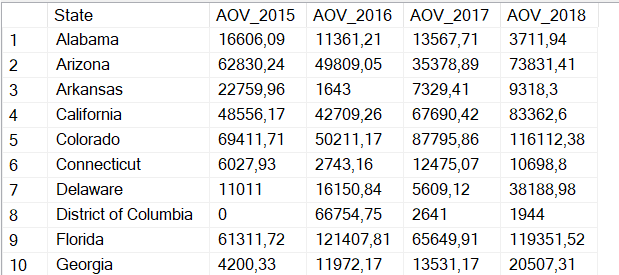

In [4]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002344.png")

**Câu hỏi:** Những tiểu bang nào đang có doanh số cao nhất? Doanh số ở các tiểu bang này có thay đổi đáng kể qua các năm không?

Mục đích: Xác định các thị trường trọng điểm và các khu vực cần tập trung cải thiện hiệu suất.

```sql
SELECT
    State,
    SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END) AS Total_Sales_2015,
    SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END) AS Total_Sales_2016,
    SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END) AS Total_Sales_2017,
    SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END) AS Total_Sales_2018
FROM sales_summary
GROUP BY State
ORDER BY Total_Sales_2018 DESC ;
```

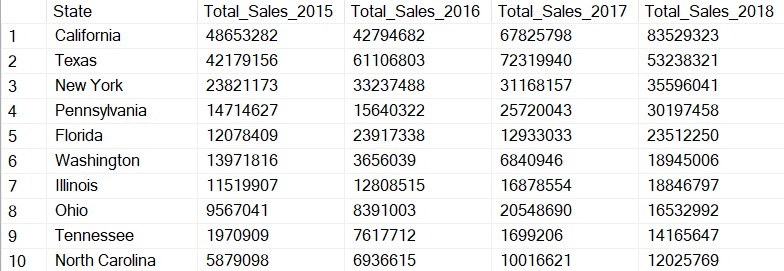

In [3]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002426.png")

**Câu hỏi:** Doanh số bán hàng hàng tháng/năm (Monthly/Yearly Sales) có xu hướng nào không? Với tần suất mua hàng (Purchase Frequency - Số đơn hàng) và Tăng trưởng doanh số (Sales Growth Rate) theo tháng và theo năm như thế nào.

Mục đích: Lập kế hoạch sản xuất, marketing và quản lý kho hàng hiệu quả hơn dựa trên các mô hình bán hàng theo thời vụ.

```sql
WITH Sales_Per_Month
AS (
    SELECT
        Sales_Year AS Sales_Year,
        Sales_Month,
        Year_Month,
        COUNT(DISTINCT Order_ID) AS Total_Orders,
        SUM(Sales) AS Total_Sales
    FROM sales_summary
    GROUP BY Sales_Year, Sales_Month, Year_Month
)

SELECT
    Sales_Year,
    Sales_Month,
    Year_Month,
    Total_Orders,
    Total_Sales,
    CASE
        WHEN LAG(Total_Sales) OVER (ORDER BY Year_Month) IS NULL THEN 0
        ELSE ROUND(((Total_Sales - LAG(Total_Sales) OVER (ORDER BY Year_Month)) /
                LAG(Total_Sales) OVER (ORDER BY Year_Month))*1.0 ,6)
    END AS Sales_Growth_Rate
FROM Sales_Per_Month
ORDER BY Year_Month ;
```

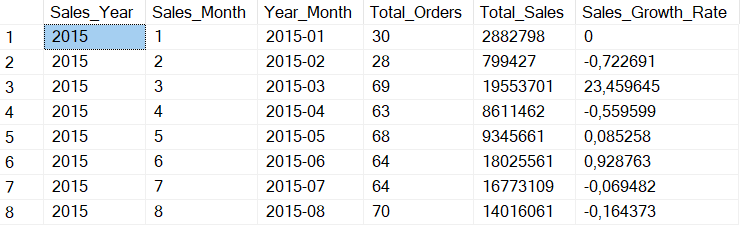

In [6]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002452.png")

```sql
WITH Sales_Per_Month
AS (
    SELECT
        Sales_Year AS Sales_Year,
        COUNT(DISTINCT Order_ID) AS Total_Orders,
        SUM(Sales) AS Total_Sales
    FROM sales_summary
    GROUP BY Sales_Year
)

SELECT
    Sales_Year,
    Total_Orders,
    Total_Sales,
    CASE
        WHEN LAG(Total_Sales) OVER (ORDER BY Sales_Year) IS NULL THEN 0
        ELSE ROUND(((Total_Sales - LAG(Total_Sales) OVER (ORDER BY Sales_Year)) /
                LAG(Total_Sales) OVER (ORDER BY Sales_Year))*1.0 ,6)
    END AS Sales_Growth_Rate
FROM Sales_Per_Month
ORDER BY Sales_Year ;
```

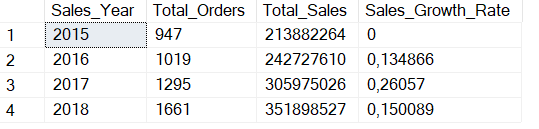

In [5]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002509.png")

**4.3. Phân tích Phân khúc Khách hàng:**

**Câu hỏi:** Tổng doanh thu mà một khách hàng (Total Sales per Customer) mang lại là bao nhiêu? Giá trị đơn hàng trung bình của họ là bao nhiêu? Thời gian gắn bó của họ là bao lâu? Giá trị vòng đời khách hàng (Customer Lifetime Value - CLTV) của họ là bao nhiêu?

Mục đích: Xác định và xây dựng mối quan hệ với những khách hàng quan trọng nhất.

```sql
SELECT
    Customer_ID,
    SUM(Sales) AS Total_Sales,
    SUM(Sales) / COUNT(DISTINCT Order_ID) AS Average_Order_Value,
    DATEDIFF(DAY, MIN(Order_Date), MAX(Order_Date)) AS Customer_Lifetime,
    COUNT(DISTINCT Order_ID) AS Total_Orders,
    AVG(Sales) AS Avg_Sales_Per_Order
FROM sales_summary
GROUP BY Customer_ID
ORDER BY SUM(Sales) DESC, COUNT(DISTINCT Order_ID) DESC;
```

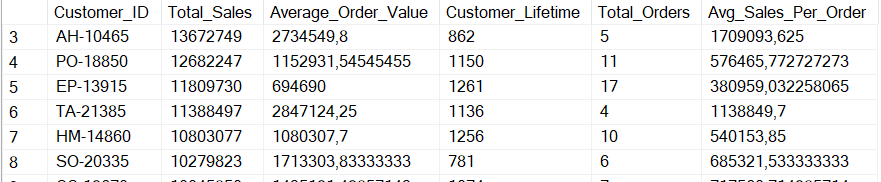

In [8]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002634.png")

**Câu hỏi:** Phân khúc khách hàng nào đang mang lại doanh số cao nhất cho chúng ta trong từng năm? Phân khúc nào có giá trị đơn hàng trung bình cao nhất?

Mục đích: Hiểu rõ hơn về các nhóm khách hàng khác nhau và điều chỉnh các chiến lược marketing và bán hàng phù hợp.

```sql
SELECT
    Segment ,
    Sales_Year,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Customer_ID) AS Total_Customers,
    COUNT(DISTINCT Order_ID) AS Total_Orders,
    SUM(Sales)/COUNT(DISTINCT Order_ID) AS Average_Order_Value
FROM sales_summary
GROUP BY Segment , Sales_Year
ORDER BY Sales_Year, SUM(Sales) DESC ;
```

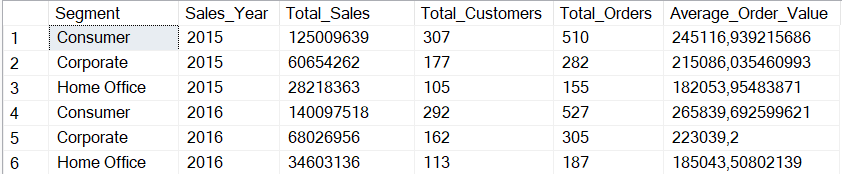

In [20]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002655.png")

**Câu hỏi:** Tần suất mua hàng trung bình của khách hàng trong từng phân khúc là bao nhiêu? Phân khúc nào có tần suất mua hàng cao nhất?

Mục đích: Đánh giá mức độ gắn bó và trung thành của khách hàng trong các phân khúc khác nhau.

```sql
WITH Next_Order AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year AS Sales_Year,
        Order_Date,
        LEAD(Order_Date) OVER (PARTITION BY Customer_ID ORDER BY Order_Date) AS Next_Order_Date
    FROM sales_summary
    GROUP BY Customer_ID, Segment, Sales_Year, Order_Date
),
Diff AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year,
        Order_Date,
        DATEDIFF(DAY, Order_Date, Next_Order_Date) AS Order_Date_Differences
    FROM Next_Order
    WHERE Next_Order_Date IS NOT NULL AND DATEDIFF(DAY, Order_Date, Next_Order_Date) > 0
),
Avg_date_diff AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year,
        AVG(Order_Date_Differences) AS Avg_Order_Date_Differences
    FROM Diff
    GROUP BY Customer_ID, Segment, Sales_Year
    HAVING COUNT(*) > 1
)

SELECT Segment, Sales_Year, Avg_Date_Differences
FROM (
    SELECT
        Segment,
        Sales_Year,
        AVG(Avg_Order_Date_Differences) AS Avg_Date_Differences,
        RANK() OVER (PARTITION BY Sales_Year ORDER BY AVG(Avg_Order_Date_Differences)) AS Ranking
    FROM Avg_date_diff
    GROUP BY Segment, Sales_Year
) AS Ranked
WHERE Ranking = 1
ORDER BY Sales_Year ;
```

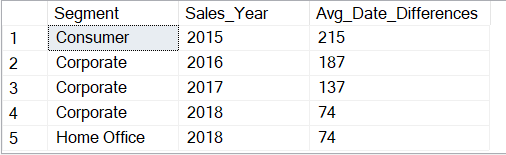

In [11]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002620.png")

**4.4. Phân tích Sản phẩm:**

**Câu hỏi:** Những sản phẩm nào đang bán chạy nhất dựa trên doanh số?

Mục đích: Hiểu rõ về sở thích của khách hàng và xác định các sản phẩm/danh mục chủ lực.

```sql
SELECT
    TOP 10 Product_Name , Category, Sub_Category,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    SUM(Sales) AS Total_Sales
FROM sales_summary
GROUP BY Product_Name , Category, Sub_Category
ORDER BY SUM(Sales) DESC ;
```

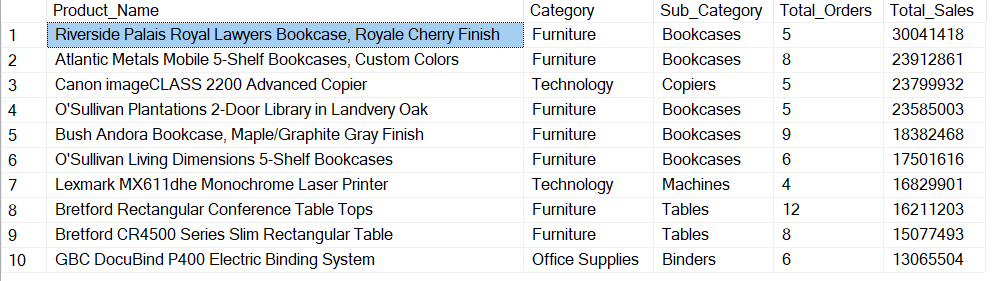

In [12]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002916.png")

**Câu hỏi:** Tỷ trọng đóng góp doanh số của từng danh mục sản phẩm (Category Contribution to Sales) đã thay đổi như thế nào qua các năm? Có danh mục nào đang tăng trưởng hoặc suy giảm đáng kể không?

Mục đích: Theo dõi sự thay đổi trong nhu cầu thị trường và hiệu suất của các dòng sản phẩm khác nhau.

```sql
SELECT
    Category, Sub_Category, SUM(Sales) AS Category_Sales,
    ROUND(SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2015),4)
                                                                    AS C_C_t_Sales_15,
    ROUND(SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2016),4)
                                                                    AS C_C_t_Sales_16,
    ROUND(SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2017),4)
                                                                    AS C_C_t_Sales_17,
    ROUND(SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2018),4)
                                                                    AS C_C_t_Sales_18
FROM sales_summary
GROUP BY Category, Sub_Category
ORDER BY SUM(Sales) DESC ;
```

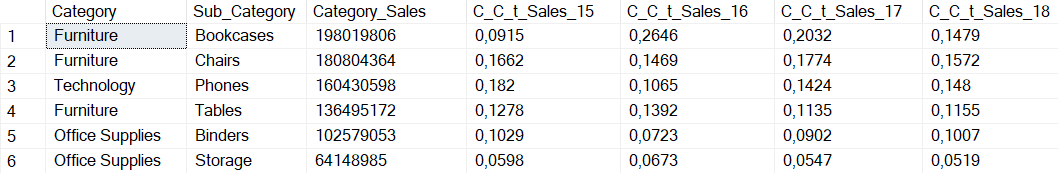

In [13]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002930.png")

**4.5. Phân tích Tỷ lệ Rời bỏ Khách hàng:**

**Câu hỏi:** Tỷ lệ rời bỏ khách hàng của chúng ta hiện tại là bao nhiêu?

Mục đích: Đo lường khả năng giữ chân khách hàng và xác định xem có vấn đề gì cần giải quyết không.

```sql
WITH Day_Leave_Over_180
AS (
SELECT
    Customer_ID,
    Segment,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT
    COUNT(*) AS Num_Churned_Customers,
    ROUND((COUNT(*) * 1.0 / (SELECT COUNT(DISTINCT Customer_ID) FROM sales_summary)),6) AS Churn_Rate
FROM Day_Leave_Over_180 ;
```

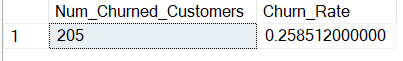

In [14]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002943.png")

**Câu hỏi:** Những khách hàng có doanh thu cao nhưng đã rời bỏ là ai? Chúng ta có thể làm gì để thu hút họ quay lại?

Mục đích: Xác định những khách hàng giá trị đã mất và tìm cách khôi phục mối quan hệ.

```sql
SELECT TOP 100
    Customer_ID,
    Segment,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180
ORDER BY SUM(Sales) DESC ;
```

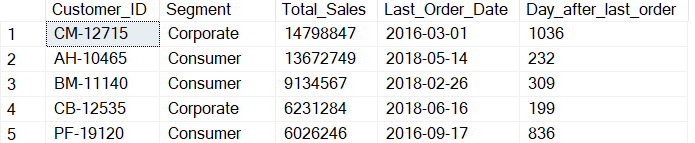

In [15]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 002957.png")

**Câu hỏi:** Phân khúc khách hàng nào có tỷ lệ rời bỏ cao nhất?

Mục đích: Xác định các nhóm khách hàng có nguy cơ rời bỏ cao và tìm hiểu nguyên nhân.

```sql
EXEC Get_Churn_Analysis 'Segment';
```

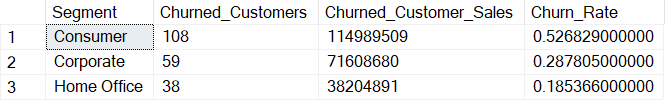

In [28]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 134820.png")

**Câu hỏi:** Phương thức vận chuyển có ảnh hưởng đến tỷ lệ rời bỏ không?

Mục đích: Đánh giá vai trò của trải nghiệm mua hàng và dịch vụ vận chuyển đối với sự hài lòng và lòng trung thành của khách hàng.

```sql
EXEC Get_Churn_Analysis 'Ship_Mode, City';
```

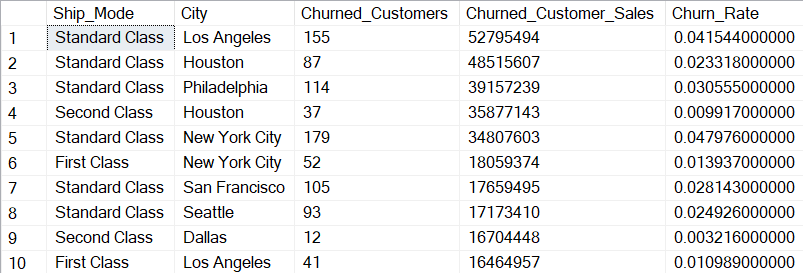

In [27]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 134720.png")

**Câu hỏi:** Những sản phẩm hoặc danh mục sản phẩm nào thường được mua bởi những khách hàng đã rời bỏ?

Mục đích: Tìm hiểu liệu có mối liên hệ nào giữa sản phẩm và việc khách hàng rời bỏ hay không.

```sql
WITH Category_Churn AS (
SELECT
    Customer_ID,
    Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 1
    COUNT(*) AS Churned_Customers, Category,
    SUM(Total_Sales) AS Churned_Customer_Sales
FROM Category_Churn
GROUP BY Category
ORDER BY Churned_Customers DESC, SUM(Total_Sales) DESC ;
```

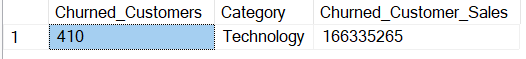

In [23]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 003039.png")

Cụ thể hơn :

```sql
WITH Sub_Category_Churn AS (
SELECT
    Customer_ID,
    Category,
    Sub_Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Category, Sub_Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 3
    Category, Sub_Category,
    SUM(Total_Sales) AS Churned_Customer_Sales
FROM Sub_Category_Churn
GROUP BY Category, Sub_Category
ORDER BY SUM(Total_Sales) DESC ;
```

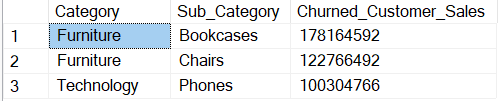

In [22]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 003048.png")

**Câu hỏi:** Có sự khác biệt nào về tỷ lệ rời bỏ giữa các phân khúc khách hàng và các danh mục sản phẩm mà họ mua không?

Mục đích: Phân tích sâu hơn về sự kết hợp giữa phân khúc khách hàng và loại sản phẩm mua để hiểu rõ hơn về nguyên nhân rời bỏ.

```sql
EXEC Get_Churn_Analysis 'Segment, Category';
```

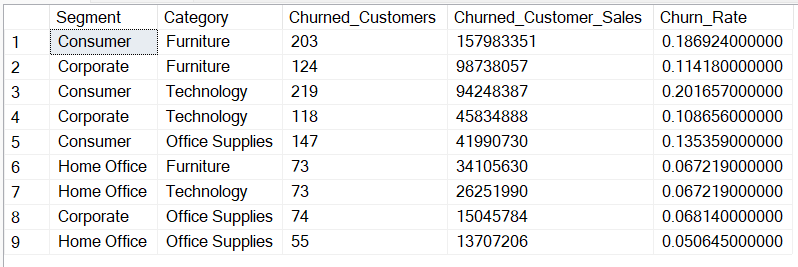

In [25]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 134405.png")

```sql
WITH Segment_Churned AS (
SELECT
    Customer_ID,
    Segment,
    Category,Sub_Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment,Category,Sub_Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 5
    COUNT(*) AS Churned_Customers, Segment, Category,Sub_Category,
    SUM(Total_Sales) AS Churned_Customer_Sales,
    ROUND(COUNT(*) * 1.0 / (SUM(COUNT(*)) OVER ()), 6) AS Churn_Rate
FROM Segment_Churned
GROUP BY Segment, Category,Sub_Category
ORDER BY Churned_Customer_Sales DESC, Churned_Customers DESC ;
```

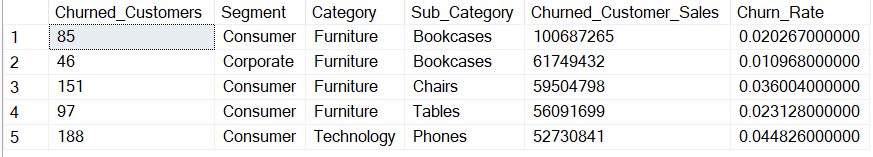

In [24]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 134420.png")

**Câu hỏi:** Thời gian giao hàng có ảnh hưởng đến tỷ lệ rời bỏ không?

Mục đích: Đánh giá vai trò của trải nghiệm mua hàng và dịch vụ vận chuyển đối với sự hài lòng và lòng trung thành của khách hàng.

```sql
WITH Day_Leave_Over_180 AS (
SELECT
    Customer_ID,
    MAX(Order_Date) AS Last_Order_Date,
    MAX(Ship_Date) AS Last_Ship_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order,
    DATEDIFF(DAY, MAX(Order_Date), MAX(Ship_Date)) AS Day_last_ship
FROM sales_summary
GROUP BY Customer_ID
HAVING DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180
)

SELECT
    Day_last_ship,
    COUNT(*) AS Num_Churned_Customers,
    ROUND(COUNT(*) * 1.0 / (SUM(COUNT(*)) OVER ()), 6) AS Churn_Rate
FROM Day_Leave_Over_180
GROUP BY Day_last_ship
ORDER BY Churn_Rate DESC ;
```

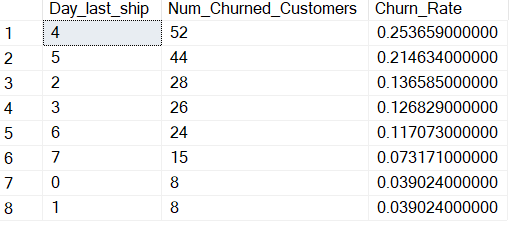

In [26]:
Image(r"C:/Users/LENOVO/OneDrive/Hình ảnh/Ảnh chụp màn hình/Ảnh chụp màn hình 2025-04-03 134555.png")

**5. Kết luận**

Báo cáo này đã trình bày quá trình làm sạch và phân tích dữ liệu bán hàng của một siêu thị, tập trung vào các xu hướng doanh số, phân khúc khách hàng và tỷ lệ rời bỏ. Các truy vấn SQL đã được sử dụng để khám phá các khía cạnh khác nhau của dữ liệu, cung cấp những hiểu biết sâu sắc về hiệu suất kinh doanh.

Dựa trên những phân tích này, doanh nghiệp có thể:

* Xác định các xu hướng doanh số theo thời gian và khu vực để đưa ra các quyết định kinh doanh sáng suốt hơn.
* Hiểu rõ hơn về các phân khúc khách hàng khác nhau và điều chỉnh các chiến lược marketing và bán hàng phù hợp.
* Đánh giá tỷ lệ rời bỏ khách hàng và xác định các yếu tố có thể dẫn đến việc khách hàng ngừng mua hàng.
* Nhận diện các sản phẩm bán chạy nhất và các danh mục sản phẩm có đóng góp doanh số cao nhất.

Các phân tích này chỉ là bước khởi đầu. Để có được cái nhìn sâu sắc hơn và đưa ra các quyết định chiến lược hiệu quả hơn, doanh nghiệp có thể tiếp tục phân tích dữ liệu này bằng cách sử dụng các kỹ thuật phân tích nâng cao hơn, kết hợp với các nguồn dữ liệu khác và xây dựng các mô hình dự đoán.

## Report English

**REPORT: DATA CLEANING AND ANALYSIS WITH STORE SALES DATA**

**Table of Contents**
* [1. Introduction](#1-introduction)
* [2. Data Description](#2-data-description)
* [3. Data Cleaning](#3-data-cleaning)
    * [3.1. Checking for NULL and Empty Values](#31-checking-for-null-and-empty-values)
    * [3.2. Handling Missing Values in the Postal\_Code Column](#32-handling-missing-values-in-the-postal_code-column)
    * [3.3. Removing Duplicate Rows](#33-removing-duplicate-rows)
    * [3.4. Removing Rows with Too Many Missing Values](#34-removing-rows-with-too-many-missing-values)
    * [3.5. Standardizing Text Data in Columns](#35-standardizing-text-data-in-columns)
    * [3.6. Imputing Missing Values in the Sales Column](#36-imputing-missing-values-in-the-sales-column)
* [4. Data Analysis](#4-data-analysis)
    * [4.1. Creating a Sales Summary Table](#41-creating-a-sales-summary-table)
    * [4.2. Sales Analysis](#42-sales-analysis)
        * [Question: What is the Average Order Value (AOV) each year? Is it trending upwards or downwards over time?](#question-what-is-the-average-order-value-aov-each-year-is-it-trending-upwards-or-downwards-over-time)
        * [Question: What is the Average Order Value (AOV) per state each year? Is it trending upwards or downwards over time?](#question-what-is-the-average-order-value-aov-per-state-each-year-is-it-trending-upwards-or-downwards-over-time)
        * [Question: Which states are generating the highest sales? Has the sales performance in these states changed significantly over the years?](#question-which-states-are-generating-the-highest-sales-has-the-sales-performance-in-these-states-changed-significantly-over-the-years)
        * [Question: What are the trends in Monthly/Yearly Sales? What is the Purchase Frequency (Number of Orders) and Sales Growth Rate on a monthly and yearly basis?](#question-what-are-the-trends-in-monthlyyearly-sales-what-is-the-purchase-frequency-number-of-orders-and-sales-growth-rate-on-a-monthly-and-yearly-basis)
    * [4.3. Customer Segmentation Analysis](#43-customer-segmentation-analysis)
        * [Question: What is the Total Sales per Customer? What is their Average Order Value? What is their Customer Lifetime? What is their Customer Lifetime Value (CLTV)?](#question-what-is-the-total-sales-per-customer-what-is-their-average-order-value-what-is-their-customer-lifetime-what-is-their-customer-lifetime-value-cltv)
        * [Question: Which customer segment is generating the highest sales for us in each year? Which segment has the highest Average Order Value?](#question-which-customer-segment-is-generating-the-highest-sales-for-us-in-each-year-which-segment-has-the-highest-average-order-value)
        * [Question: What is the average Purchase Frequency of customers within each segment? Which segment has the highest Purchase Frequency?](#question-what-is-the-average-purchase-frequency-of-customers-within-each-segment-which-segment-has-the-highest-purchase-frequency)
    * [4.4. Product Analysis](#44-product-analysis)
        * [Question: Which products are the best-selling based on sales revenue?](#question-which-products-are-the-best-selling-based-on-sales-revenue)
        * [Question: How has the Category Contribution to Sales changed over the years? Are there any categories experiencing significant growth or decline?](#question-how-has-the-category-contribution-to-sales-changed-over-the-years-are-there-any-categories-experiencing-significant-growth-or-decline)
    * [4.5. Customer Churn Rate Analysis](#45-customer-churn-rate-analysis)
        * [Question: What is our current Customer Churn Rate?](#question-what-is-our-current-customer-churn-rate)
        * [Question: Who are the high-revenue customers who have churned? What can we do to win them back?](#question-who-are-the-high-revenue-customers-who-have-churned-what-can-we-do-to-win-them-back)
        * [Question: Which customer segment has the highest churn rate?](#question-which-customer-segment-has-the-highest-churn-rate)
        * [Question: What products or product categories are commonly purchased by customers who have churned?](#question-what-products-or-product-categories-are-commonly-purchased-by-customers-who-have-churned)
        * [Question: Does the Ship Mode have any impact on the churn rate?](#question-does-the-ship-mode-have-any-impact-on-the-churn-rate)
        * [Question: Does the delivery time impact the churn rate?](#question-does-the-delivery-time-impact-the-churn-rate)
        * [Question: Is there any difference in churn rate between different customer segments and the product categories they purchase?](#question-is-there-any-difference-in-churn-rate-between-different-customer-segments-and-the-product-categories-they-purchase)
* [5. Conclusion](#5-conclusion)
  

**1. Introduction**

This report presents the data cleaning and analysis process conducted on the sales data of a superstore in the United States. This data was collected and made available on the Kaggle platform, encompassing detailed information about orders, customers, products, and sales revenue over several years. The primary objectives of this report are to explore sales trends over time, across regions, and based on other factors, as well as to analyze customer segments based on sales and conduct an in-depth study of customer churn rate. These analyses will provide valuable insights to help the business assess its performance and optimize sales strategies.

**2. Data Description**

The dataset used in this report is a single table with 19 columns, capturing information from the superstore's sales transactions. The data fields include:

* `Row_ID`: Unique identifier for each row.
* `Order_ID`: Unique identifier for each order.
* `Order_Date`: Date when the customer placed the order.
* `Ship_Date`: Date when the order was shipped.
* `Ship_Mode`: Shipping method chosen by the customer.
* `Customer_ID`: Unique identifier for each customer.
* `Customer_Name`: Name of the customer.
* `Segment`: Customer segment (e.g., Consumer, Corporate, Home Office).
* `Country`: Country where the order was placed (in this case, United States).
* `City`: City where the customer resides.
* `State`: State where the customer resides.
* `Postal_Code`: Postal code of the customer.
* `Region`: Geographical region where the customer resides.
* `Product_ID`: Unique identifier for each product.
* `Category`: Product category (e.g., Furniture, Office Supplies, Technology).
* `Sub_Category`: Sub-category of the product (e.g., Tables, Chairs, Pens, Phones).
* `Product_Name`: Name of the product.
* `Sales`: Sales revenue of the order.

This data reflects orders placed over multiple years, providing a comprehensive view of customer purchasing behavior and the superstore's sales performance. Sales revenue is a crucial indicator for evaluating business effectiveness and is the primary focus of the analyses in this report.

**3. Data Cleaning**

The data cleaning process is a critical step to ensure the accuracy and consistency of the data before proceeding with analysis. Below are the data cleaning steps that were performed using SQL:

**3.1. Checking for NULL and Empty Values:**

Purpose: To identify columns containing NULL or empty values for appropriate handling.

```sql
CREATE PROCEDURE Check_Null_Columns AS
BEGIN
    DECLARE @sql NVARCHAR(MAX) = '';
    -- Initialize the query
    SET @sql = 'SELECT Column_Name, Null_Count FROM ( ';
    -- Iterate through the list of columns and check for NULL + empty values
    SELECT @sql = @sql +
        'SELECT ''' + COLUMN_NAME + ''' AS Column_Name, COUNT(*) AS Null_Count
         FROM sales
         WHERE [' + COLUMN_NAME + '] IS NULL ' +
         CASE
            WHEN DATA_TYPE IN ('nvarchar', 'varchar', 'char', 'nchar', 'text', 'ntext')
            THEN ' OR [' + COLUMN_NAME + '] = '''' OR
                  [' + COLUMN_NAME + '] = '' '' OR
                  [' + COLUMN_NAME + '] = ''-'' '
            ELSE ''
         END + ' UNION ALL '
    FROM INFORMATION_SCHEMA.COLUMNS
    WHERE TABLE_NAME = 'sales';
    -- Remove the last "UNION ALL" to avoid errors
    SET @sql = LEFT(@sql, LEN(@sql) - 10) + ') AS Result WHERE Null_Count > 0;';
    -- Execute the dynamic query
    EXEC sp_executesql @sql;
END;

EXEC Check_Null_Columns;
```

**3.2. Handling Missing Values in the Postal\_Code Column:**

Purpose: To identify and address rows with NULL values in the `Postal_Code` column.

```sql
SELECT *
FROM sales
WHERE Postal_Code IS NULL ;

SELECT *
FROM sales
WHERE City = 'Burlington' AND State='Vermont' ;

ALTER TABLE sales
DROP COLUMN Postal_Code ;
```

* **Explanation:** After inspection, it was observed that the NULL values in the `Postal_Code` column all belonged to the city 'Burlington' and state 'Vermont'. As this column is not essential for the primary analyses in this report, we decided to drop the `Postal_Code` column to simplify the dataset.

**3.3. Removing Duplicate Rows:**

Purpose: To eliminate duplicate records that could affect the accuracy of the analysis.

```sql
WITH CTE AS (
    SELECT *, ROW_NUMBER() OVER (
        PARTITION BY Order_ID, Order_Date, Ship_Date, Customer_ID, Product_ID, Sales , State, City, Ship_Mode, Product_ID
        ORDER BY (SELECT NULL)
    ) AS Row_Number
    FROM sales
)
DELETE FROM CTE WHERE Row_Number > 1 ;
```

* **Explanation:** A Common Table Expression (CTE) was used to number the rows based on the duplication of several important columns. Subsequently, rows with a row number greater than 1, i.e., the duplicate rows, were deleted.

**3.4. Removing Rows with Too Many Missing Values:**

Purpose: To remove rows with a significant number of NULL or empty values across multiple columns, as they may not provide sufficient useful information for analysis.

```sql
DELETE FROM sales
WHERE
    (CASE WHEN Order_ID IS NULL OR Order_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Order_Date IS NULL OR Order_Date = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Ship_Date IS NULL OR Ship_Date = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Ship_Mode IS NULL OR Ship_Mode = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Customer_ID IS NULL OR Customer_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN City IS NULL OR City = '' THEN 1 ELSE 0 END) +
    (CASE WHEN State IS NULL OR State = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Product_ID IS NULL OR Product_ID = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Product_Name IS NULL OR Product_Name = '' THEN 1 ELSE 0 END) +
    (CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) >= 6 ;
```

* **Explanation:** The number of columns with NULL or empty values in each row was counted. If this count was greater than or equal to 6, the row was deleted.

**3.5. Standardizing Text Data in Columns:**

Purpose: To ensure consistency in text data by converting all values to lowercase and correcting any spelling errors or variations in writing.

```sql
UPDATE sales
SET Ship_Mode = LOWER(Ship_Mode),
    Country = LOWER(Country),
    City = LOWER(City),
    Region = LOWER(Region),
    State = LOWER(State) ;

SELECT DISTINCT Ship_Mode
FROM sales
UPDATE sales
SET Ship_Mode = 'Second Class'
WHERE Ship_Mode LIKE 'second%' ;
UPDATE sales
SET Ship_Mode = 'Standard Class'
WHERE Ship_Mode LIKE 'stantard%' ;

SELECT DISTINCT Country
FROM sales
UPDATE sales
SET Country = 'United States' ;

SELECT DISTINCT Region
FROM sales
UPDATE sales
SET Region = 'West'
WHERE Region IN ('W', 'w', 'west') ;
UPDATE sales
SET Region = 'South'
WHERE Region IN ('S', 's', 'south') ;
UPDATE sales
SET Region = 'Central'
WHERE Region IN ('C', 'c', 'central') ;
UPDATE sales
SET Region = 'East'
WHERE Region IN ('E', 'e', 'east') ;
```

* **Explanation:**
    * The `Ship_Mode`, `Country`, `City`, `Region`, and `State` columns were converted to lowercase.
    * Spelling errors or variations in the `Ship_Mode` column were corrected (e.g., 'second%' to 'Second Class', 'stantard%' to 'Standard Class').
    * The value in the `Country` column was ensured to be 'United States'.
    * Different variations of the `Region` column were standardized to 'West', 'South', 'Central', and 'East'.

**3.6. Imputing Missing Values in the Sales Column:**

Purpose: To handle NULL values in the `Sales` column by filling them with the average value of the corresponding group.

```sql
UPDATE sales
SET Sales = (
    SELECT AVG(Sales)
    FROM sales AS s2
    WHERE s2.Segment = sales.Segment
    AND s2.Category = sales.Category
    AND s2.Sub_Category = sales.Sub_Category
    AND s2.Ship_Mode = sales.Ship_Mode
    AND s2.Region = sales.Region
    AND s2.State = sales.State
    AND s2.Sales IS NOT NULL
)
WHERE Sales IS NULL;
```

* **Explanation:** NULL values in the `Sales` column were imputed with the average `Sales` value for records with the same `Segment`, `Category`, `Sub_Category`, `Ship_Mode`, `Region`, and `State`. This helps preserve information and avoid skewing analyses related to sales revenue.

**4. Data Analysis**

After the data cleaning process, we proceeded with the analysis to answer business questions and uncover important trends.

**4.1. Creating a Sales Summary Table:**

Purpose: To create a temporary table to simplify analysis queries by extracting necessary information from the `Order_Date` column.

```sql
SELECT
    Order_ID,
    YEAR(Order_Date) AS Sales_Year,
    MONTH(Order_Date) AS Sales_Month,
    FORMAT(Order_Date, 'yyyy-MM') AS Year_Month,
    Order_Date,
    Ship_Date,
    Ship_Mode,
    DATEDIFF(DAY, Order_Date, Ship_Date) AS Date_Differences,
    Customer_ID, Customer_Name, Segment,
    City, State, Region,
    Category, Sub_Category, Product_Name,
    Sales
INTO sales_summary
FROM sales;
```

* **Explanation:** The `sales_summary` table contains information about the sales year, sales month, year-month format, and delivery time differences, making time-based analysis easier.

**4.2. Sales Analysis:**

**Question:** What is the Average Order Value (AOV) each year? Is it trending upwards or downwards over time?

Purpose: To evaluate overall sales performance and track changes in customer spending behavior.

```sql
SELECT
    Sales_Year,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    ROUND(SUM(Sales)/COUNT(DISTINCT Order_ID),4) AS Average_Order_Value
FROM sales_summary
GROUP BY Sales_Year;

SELECT
    Sales_Year,
    Segment,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    ROUND(SUM(Sales)/COUNT(DISTINCT Order_ID),4) AS Average_Order_Value
FROM sales_summary
GROUP BY Sales_Year, Segment ;
```

**Question:** What is the Average Order Value (AOV) per state each year? Is it trending upwards or downwards over time?

Purpose: To evaluate overall sales performance and track changes in customer spending behavior by state.

```sql
SELECT
    State,
    ROUND(SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2015,
    ROUND(SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2016,
    ROUND(SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2017,
    ROUND(SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END)/COUNT(DISTINCT Order_ID),2) AS AOV_2018
FROM sales_summary
GROUP BY State
ORDER BY State ASC ;
```

**Question:** Which states are generating the highest sales? Has the sales performance in these states changed significantly over the years?

Purpose: To identify key markets and areas where performance improvement may be needed.

```sql
SELECT
    State,
    SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END) AS Total_Sales_2015,
    SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END) AS Total_Sales_2016,
    SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END) AS Total_Sales_2017,
    SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END) AS Total_Sales_2018
FROM sales_summary
GROUP BY State
ORDER BY Total_Sales_2018 DESC ;
```

**Question:** What are the trends in Monthly/Yearly Sales? What is the Purchase Frequency (Number of Orders) and Sales Growth Rate on a monthly and yearly basis?

Purpose: To plan production, marketing, and inventory management more effectively based on seasonal sales patterns.

```sql
WITH Sales_Per_Month
AS (
    SELECT
        Sales_Year AS Sales_Year,
        Sales_Month,
        Year_Month,
        COUNT(DISTINCT Order_ID) AS Total_Orders,
        SUM(Sales) AS Total_Sales
    FROM sales_summary
    GROUP BY Sales_Year, Sales_Month, Year_Month
)

SELECT
    Sales_Year,
    Sales_Month,
    Year_Month,
    Total_Orders,
    Total_Sales,
    CASE
        WHEN LAG(Total_Sales) OVER (ORDER BY Year_Month) IS NULL THEN 0
        ELSE ROUND(((Total_Sales - LAG(Total_Sales) OVER (ORDER BY Year_Month)) /
                LAG(Total_Sales) OVER (ORDER BY Year_Month))*1.0 ,6)
    END AS Sales_Growth_Rate
FROM Sales_Per_Month
ORDER BY Year_Month ;

WITH Sales_Per_Month
AS (
    SELECT
        Sales_Year AS Sales_Year,
        COUNT(DISTINCT Order_ID) AS Total_Orders,
        SUM(Sales) AS Total_Sales
    FROM sales_summary
    GROUP BY Sales_Year
)

SELECT
    Sales_Year,
    Total_Orders,
    Total_Sales,
    CASE
        WHEN LAG(Total_Sales) OVER (ORDER BY Sales_Year) IS NULL THEN 0
        ELSE ROUND(((Total_Sales - LAG(Total_Sales) OVER (ORDER BY Sales_Year)) /
                LAG(Total_Sales) OVER (ORDER BY Sales_Year))*1.0 ,6)
    END AS Sales_Growth_Rate
FROM Sales_Per_Month
ORDER BY Sales_Year ;
```

**4.3. Customer Segmentation Analysis:**

**Question:** What is the Total Sales per Customer? What is their Average Order Value? What is their Customer Lifetime? What is their Customer Lifetime Value (CLTV)?

Purpose: To identify and build relationships with the most important customers.

```sql
SELECT
    Customer_ID,
    SUM(Sales) AS Total_Sales,
    SUM(Sales) / COUNT(DISTINCT Order_ID) AS Average_Order_Value,
    DATEDIFF(DAY, MIN(Order_Date), MAX(Order_Date)) AS Customer_Lifetime,
    COUNT(DISTINCT Order_ID) AS Total_Orders,
    AVG(Sales) AS Avg_Sales_Per_Order
FROM sales_summary
GROUP BY Customer_ID
ORDER BY SUM(Sales) DESC, COUNT(DISTINCT Order_ID) DESC;
```

**Question:** Which customer segment is generating the highest sales for us in each year? Which segment has the highest Average Order Value?

Purpose: To better understand different customer groups and tailor marketing and sales strategies accordingly.

```sql
SELECT
    Segment ,
    Sales_Year,
    SUM(Sales) AS Total_Sales,
    COUNT(DISTINCT Customer_ID) AS Total_Customers,
    COUNT(DISTINCT Order_ID) AS Total_Orders,
    SUM(Sales)/COUNT(DISTINCT Order_ID) AS Average_Order_Value
FROM sales_summary
GROUP BY Segment , Sales_Year
ORDER BY Sales_Year, SUM(Sales) DESC ;
```

**Question:** What is the average Purchase Frequency of customers within each segment? Which segment has the highest Purchase Frequency?

Purpose: To assess the level of engagement and loyalty of customers in different segments.

```sql
WITH Next_Order AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year AS Sales_Year,
        Order_Date,
        LEAD(Order_Date) OVER (PARTITION BY Customer_ID ORDER BY Order_Date) AS Next_Order_Date
    FROM sales_summary
    GROUP BY Customer_ID, Segment, Sales_Year, Order_Date
),
Diff AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year,
        Order_Date,
        DATEDIFF(DAY, Order_Date, Next_Order_Date) AS Order_Date_Differences
    FROM Next_Order
    WHERE Next_Order_Date IS NOT NULL AND DATEDIFF(DAY, Order_Date, Next_Order_Date) > 0
),
Avg_date_diff AS (
    SELECT
        Customer_ID,
        Segment,
        Sales_Year,
        AVG(Order_Date_Differences) AS Avg_Order_Date_Differences
    FROM Diff
    GROUP BY Customer_ID, Segment, Sales_Year
    HAVING COUNT(*) > 1
)

SELECT Segment, Sales_Year, Avg_Date_Differences
FROM (
    SELECT
        Segment,
        Sales_Year,
        AVG(Avg_Order_Date_Differences) AS Avg_Date_Differences,
        RANK() OVER (PARTITION BY Sales_Year ORDER BY AVG(Avg_Order_Date_Differences)) AS Ranking
    FROM Avg_date_diff
    GROUP BY Segment, Sales_Year
) AS Ranked
WHERE Ranking = 1
ORDER BY Sales_Year ;
```

**4.4. Product Analysis:**

**Question:** Which products are the best-selling based on sales revenue?

Purpose: To understand customer preferences and identify key products/categories.

```sql
SELECT
    TOP 10 Product_Name , Category, Sub_Category,
    COUNT(DISTINCT Order_ID) AS Total_Orders ,
    SUM(Sales) AS Total_Sales
FROM sales_summary
GROUP BY Product_Name , Category, Sub_Category
ORDER BY SUM(Sales) DESC ;
```

**Question:** How has the Category Contribution to Sales changed over the years? Are there any categories experiencing significant growth or decline?

Purpose: To track changes in market demand and the performance of different product lines.

```sql
SELECT
    Category, Sub_Category, SUM(Sales) AS Category_Sales,
    ROUND(SUM(CASE WHEN Sales_Year = 2015 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2015),4)
                                                                    AS C_C_t_Sales_15,
    ROUND(SUM(CASE WHEN Sales_Year = 2016 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2016),4)
                                                                    AS C_C_t_Sales_16,
    ROUND(SUM(CASE WHEN Sales_Year = 2017 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2017),4)
                                                                    AS C_C_t_Sales_17,
    ROUND(SUM(CASE WHEN Sales_Year = 2018 THEN Sales ELSE 0 END)/(SELECT SUM(Sales)
                                                                    FROM sales_summary
                                                                    WHERE Sales_Year = 2018),4)
                                                                    AS C_C_t_Sales_18
FROM sales_summary
GROUP BY Category, Sub_Category
ORDER BY SUM(Sales) DESC ;
```

**4.5. Customer Churn Rate Analysis:**

**Question:** What is our current Customer Churn Rate?

Purpose: To measure customer retention and identify if there are any issues that need to be addressed.

```sql
WITH Day_Leave_Over_180
AS (
SELECT
    Customer_ID,
    Segment,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT
    COUNT(*) AS Num_Churned_Customers,
    ROUND((COUNT(*) * 1.0 / (SELECT COUNT(DISTINCT Customer_ID) FROM sales_summary)),6) AS Churn_Rate
FROM Day_Leave_Over_180 ;
```

**Question:** Who are the high-revenue customers who have churned? What can we do to win them back?

Purpose: To identify valuable customers who have been lost and explore ways to re-engage them.

```sql
SELECT TOP 100
    Customer_ID,
    Segment,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180
ORDER BY SUM(Sales) DESC ;
```

**Question:** Which customer segment has the highest churn rate?

Purpose: To identify customer groups with a high risk of churn and understand the reasons behind it.

```sql
WITH Segment_Churned AS (
SELECT
    Customer_ID,
    Segment,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT
    COUNT(*) AS Churned_Customers, Segment, SUM(Total_Sales) AS Churned_Customer_Sales
FROM Segment_Churned
GROUP BY Segment
ORDER BY Churned_Customers DESC ;

EXEC Get_Churn_Analysis 'Segment';
```

**Question:** What products or product categories are commonly purchased by customers who have churned?

Purpose: To investigate if there is any correlation between products and customer churn.

```sql
WITH Category_Churn AS (
SELECT
    Customer_ID,
    Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 1
    COUNT(*) AS Churned_Customers, Category,
    SUM(Total_Sales) AS Churned_Customer_Sales
FROM Category_Churn
GROUP BY Category
ORDER BY Churned_Customers DESC, SUM(Total_Sales) DESC ;

WITH Sub_Category_Churn AS (
SELECT
    Customer_ID,
    Category,
    Sub_Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Category, Sub_Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 3
    Category, Sub_Category,
    SUM(Total_Sales) AS Churned_Customer_Sales
FROM Sub_Category_Churn
GROUP BY Category, Sub_Category
ORDER BY SUM(Total_Sales) DESC ;
```

**Question:** Does the Ship Mode have any impact on the churn rate?

Purpose: To evaluate the role of the purchasing experience and shipping service on customer satisfaction and loyalty.

```sql
WITH Ship_Mode_Churn AS (
SELECT
    Customer_ID,
    Ship_Mode,
    City,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Ship_Mode, City
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT
    Ship_Mode,
    City,
    SUM(Total_Sales) AS Churned_Customer_Sales
FROM Ship_Mode_Churn
GROUP BY Ship_Mode, City
ORDER BY Churned_Customer_Sales DESC;

EXEC Get_Churn_Analysis 'Ship_Mode, City';
```

**Question:** Does the delivery time impact the churn rate?

Purpose: To evaluate the role of the purchasing experience and shipping service on customer satisfaction and loyalty.

```sql
WITH Day_Leave_Over_180 AS (
SELECT
    Customer_ID,
    MAX(Order_Date) AS Last_Order_Date,
    MAX(Ship_Date) AS Last_Ship_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order,
    DATEDIFF(DAY, MAX(Order_Date), MAX(Ship_Date)) AS Day_last_ship
FROM sales_summary
GROUP BY Customer_ID
HAVING DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180
)

SELECT
    Day_last_ship,
    COUNT(*) AS Num_Churned_Customers,
    ROUND(COUNT(*) * 1.0 / (SUM(COUNT(*)) OVER ()), 6) AS Churn_Rate
FROM Day_Leave_Over_180
GROUP BY Day_last_ship
ORDER BY Churn_Rate DESC ;
```

**Question:** Is there any difference in churn rate between different customer segments and the product categories they purchase?

Purpose: To further analyze the combination of customer segments and the type of products purchased to better understand the reasons for churn.

```sql
EXEC Get_Churn_Analysis 'Segment, Category';

WITH Segment_Churned AS (
SELECT
    Customer_ID,
    Segment,
    Category,Sub_Category,
    SUM(Sales) AS Total_Sales,
    MAX(Order_Date) AS Last_Order_Date,
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') AS Day_after_last_order
FROM sales_summary
GROUP BY Customer_ID, Segment,Category,Sub_Category
HAVING
    DATEDIFF(DAY, MAX(Order_Date), '2019-01-01') > 180 )

SELECT TOP 5
    COUNT(*) AS Churned_Customers, Segment, Category,Sub_Category,
    SUM(Total_Sales) AS Churned_Customer_Sales,
    ROUND(COUNT(*) * 1.0 / (SUM(COUNT(*)) OVER ()), 6) AS Churn_Rate
FROM Segment_Churned
GROUP BY Segment, Category,Sub_Category
ORDER BY Churned_Customer_Sales DESC, Churned_Customers DESC ;
```

**5. Conclusion**

This report has presented the data cleaning and analysis process for a superstore's sales data, focusing on sales trends, customer segmentation, and churn rate. SQL queries were utilized to explore various aspects of the data, providing insightful information about business performance.

Based on these analyses, the business can:

* Identify sales trends over time and region to make more informed business decisions.
* Gain a better understanding of different customer segments and tailor marketing and sales strategies accordingly.
* Assess the customer churn rate and identify factors that may lead to customers ceasing purchases.
* Recognize the best-selling products and product categories with the highest sales contribution.

These analyses are just the beginning. To gain deeper insights and make more effective strategic decisions, the business can further analyze this data using more advanced analytical techniques, combine it with other data sources, and build predictive models.